<a href="https://www.kaggle.com/code/omidsakaki1370/missing-values?scriptVersionId=204847383" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/data-preparation-example/credit_risk_dataset.csv


In [2]:
import pandas as pd
import numpy as np
from scipy import stats
from sklearn.preprocessing import MinMaxScaler, StandardScaler, LabelEncoder
import seaborn as sns
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

In [3]:
df_example = pd.read_csv('/kaggle/input/data-preparation-example/credit_risk_dataset.csv')

In [4]:
df_example.head(10)

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length
0,22,59000,RENT,123.0,PERSONAL,D,35000,16.02,1,0.59,Y,3
1,21,9600,OWN,5.0,EDUCATION,B,1000,11.14,0,0.10,N,2
2,25,9600,MORTGAGE,1.0,MEDICAL,C,5500,12.87,1,0.57,N,3
3,23,65500,RENT,4.0,MEDICAL,C,35000,15.23,1,0.53,N,2
4,24,54400,RENT,8.0,MEDICAL,C,35000,14.27,1,0.55,Y,4
5,21,9900,OWN,2.0,VENTURE,A,2500,7.14,1,0.25,N,2
6,26,77100,RENT,8.0,EDUCATION,B,35000,12.42,1,0.45,N,3
7,24,78956,RENT,5.0,MEDICAL,B,35000,11.11,1,0.44,N,4
8,24,83000,RENT,8.0,PERSONAL,A,35000,8.90,1,0.42,N,2
9,21,10000,OWN,6.0,VENTURE,D,1600,14.74,1,0.16,N,3


In [5]:
df_example.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32581 entries, 0 to 32580
Data columns (total 12 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   person_age                  32581 non-null  int64  
 1   person_income               32581 non-null  int64  
 2   person_home_ownership       32581 non-null  object 
 3   person_emp_length           31686 non-null  float64
 4   loan_intent                 32581 non-null  object 
 5   loan_grade                  32581 non-null  object 
 6   loan_amnt                   32581 non-null  int64  
 7   loan_int_rate               29465 non-null  float64
 8   loan_status                 32581 non-null  int64  
 9   loan_percent_income         32581 non-null  float64
 10  cb_person_default_on_file   32581 non-null  object 
 11  cb_person_cred_hist_length  32581 non-null  int64  
dtypes: float64(3), int64(5), object(4)
memory usage: 3.0+ MB


In [6]:
missing_values_count = df_example.isnull().sum()

missing_values_count

person_age                       0
person_income                    0
person_home_ownership            0
person_emp_length              895
loan_intent                      0
loan_grade                       0
loan_amnt                        0
loan_int_rate                 3116
loan_status                      0
loan_percent_income              0
cb_person_default_on_file        0
cb_person_cred_hist_length       0
dtype: int64

In [7]:
df_example['loan_int_rate'].isna()

0        False
1        False
2        False
3        False
4        False
         ...  
32576    False
32577    False
32578    False
32579    False
32580    False
Name: loan_int_rate, Length: 32581, dtype: bool

In [8]:
# how many total missing values do we have?
total_cells = np.product(df_example.shape)
total_missing = missing_values_count.sum()

In [9]:
percent_missing = (total_missing/total_cells) * 100
print(percent_missing)

1.025904668364998


## **Drop missing values**

In [10]:
df_example.dropna()

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length
0,22,59000,RENT,123.0,PERSONAL,D,35000,16.02,1,0.59,Y,3
1,21,9600,OWN,5.0,EDUCATION,B,1000,11.14,0,0.10,N,2
2,25,9600,MORTGAGE,1.0,MEDICAL,C,5500,12.87,1,0.57,N,3
3,23,65500,RENT,4.0,MEDICAL,C,35000,15.23,1,0.53,N,2
4,24,54400,RENT,8.0,MEDICAL,C,35000,14.27,1,0.55,Y,4
...,...,...,...,...,...,...,...,...,...,...,...,...
32576,57,53000,MORTGAGE,1.0,PERSONAL,C,5800,13.16,0,0.11,N,30
32577,54,120000,MORTGAGE,4.0,PERSONAL,A,17625,7.49,0,0.15,N,19
32578,65,76000,RENT,3.0,HOMEIMPROVEMENT,B,35000,10.99,1,0.46,N,28
32579,56,150000,MORTGAGE,5.0,PERSONAL,B,15000,11.48,0,0.10,N,26


In [11]:
# remove all columns with at least one missing value
columns_with_na_dropped = df_example.dropna(axis=1)
columns_with_na_dropped.head()

,person_age,person_income,person_home_ownership,loan_intent,loan_grade,loan_amnt,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length
0,22,59000,RENT,PERSONAL,D,35000,1,0.59,Y,3
1,21,9600,OWN,EDUCATION,B,1000,0,0.10,N,2
2,25,9600,MORTGAGE,MEDICAL,C,5500,1,0.57,N,3
3,23,65500,RENT,MEDICAL,C,35000,1,0.53,N,2
4,24,54400,RENT,MEDICAL,C,35000,1,0.55,Y,4


In [12]:
# just how much data did we lose?
print("Columns in original dataset: %d \n" % df_example.shape[1])
print("Columns with na's dropped: %d" % columns_with_na_dropped.shape[1])

Columns in original dataset: 12 

Columns with na's dropped: 10


## **Filling in missing values automatically**

### **fillna(0)**

In [13]:
df_0 = df_example['loan_int_rate'].fillna(0)
missing_values_count = df_0.isnull().sum()

print(missing_values_count)
df_0.head(10)

0


0    16.02
1    11.14
2    12.87
3    15.23
4    14.27
5     7.14
6    12.42
7    11.11
8     8.90
9    14.74
Name: loan_int_rate, dtype: float64

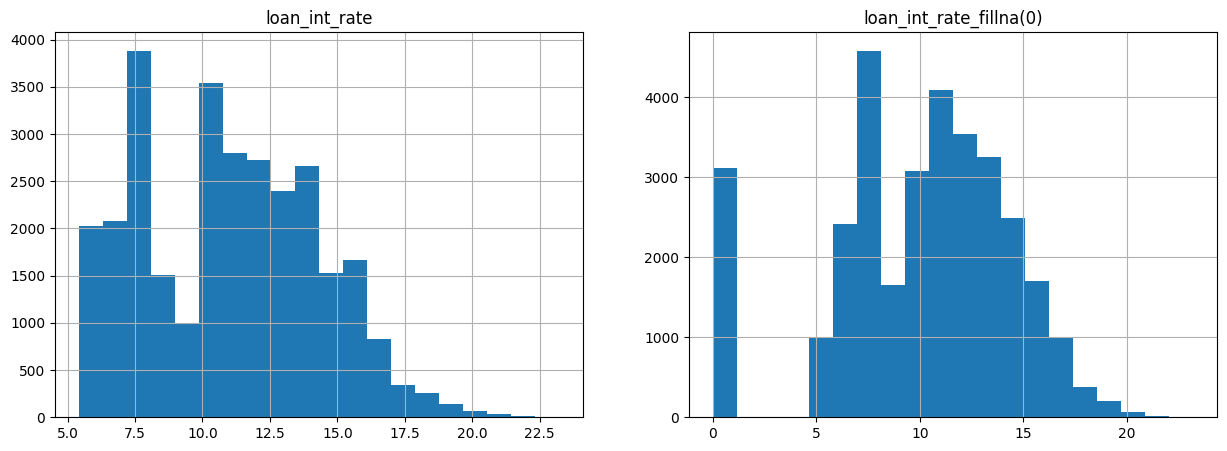

In [14]:
ax1 = plt.subplot(121)
df_example['loan_int_rate'].hist(bins=20, figsize=(15,5));
ax1.set_title("loan_int_rate");

ax2 = plt.subplot(122)
df_0.hist(bins=20);
ax2.set_title("loan_int_rate_fillna(0)");

### **fillna(mean())**

In [15]:
df_mean = df_example['loan_int_rate'].fillna(df_example['loan_int_rate'].mean())
missing_values_count = df_mean.isnull().sum()

print(missing_values_count)
df_mean.head(10)

0


0    16.02
1    11.14
2    12.87
3    15.23
4    14.27
5     7.14
6    12.42
7    11.11
8     8.90
9    14.74
Name: loan_int_rate, dtype: float64

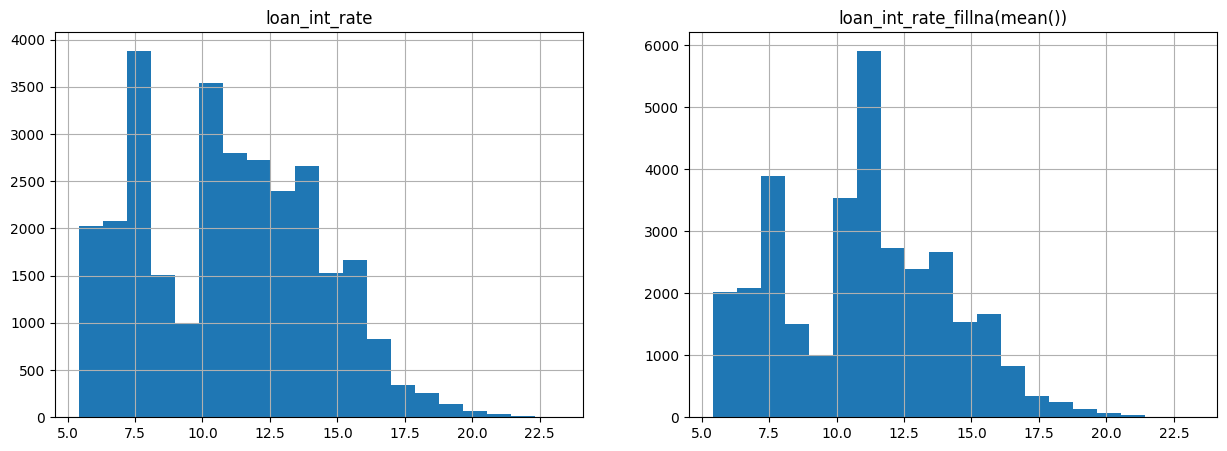

In [16]:
ax1 = plt.subplot(121)
df_example['loan_int_rate'].hist(bins=20, figsize=(15,5));
ax1.set_title("loan_int_rate");

ax2 = plt.subplot(122)
df_mean.hist(bins=20);
ax2.set_title("loan_int_rate_fillna(mean())");

### **fillna(method = 'ffill')**

In [17]:
df_ffill = df_example['loan_int_rate'].fillna(method = 'ffill')
missing_values_count = df_ffill.isnull().sum()

print(missing_values_count)
df_ffill.head(10)

0


0    16.02
1    11.14
2    12.87
3    15.23
4    14.27
5     7.14
6    12.42
7    11.11
8     8.90
9    14.74
Name: loan_int_rate, dtype: float64

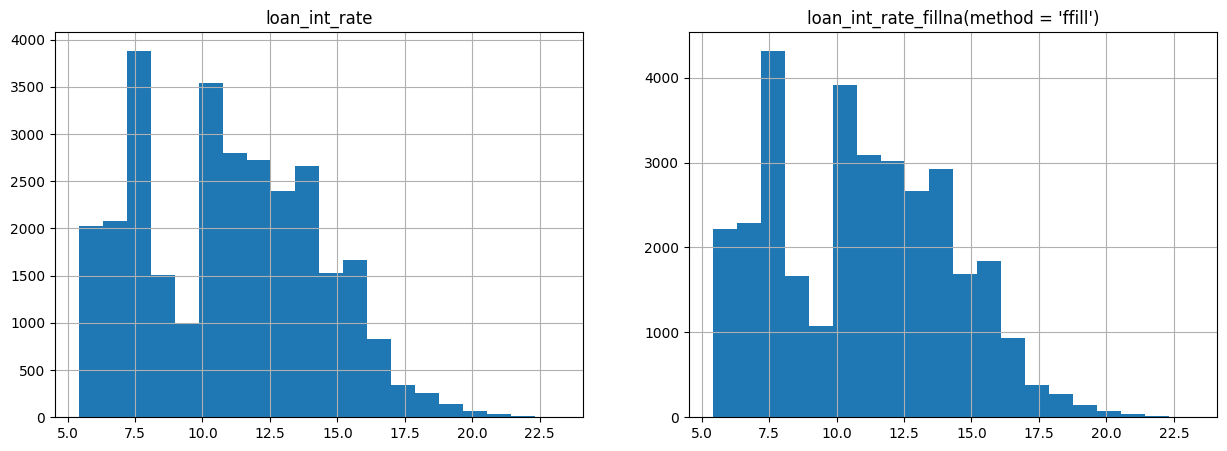

In [18]:
ax1 = plt.subplot(121)
df_example['loan_int_rate'].hist(bins=20, figsize=(15,5));
ax1.set_title("loan_int_rate");

ax2 = plt.subplot(122)
df_ffill.hist(bins=20);
ax2.set_title("loan_int_rate_fillna(method = 'ffill')");

### **fillna(method = 'pad')**

In [19]:
df_pad = df_example['loan_int_rate'].fillna(method = 'pad')
missing_values_count = df_pad.isnull().sum()

print(missing_values_count)
df_pad.head(10)

0


0    16.02
1    11.14
2    12.87
3    15.23
4    14.27
5     7.14
6    12.42
7    11.11
8     8.90
9    14.74
Name: loan_int_rate, dtype: float64

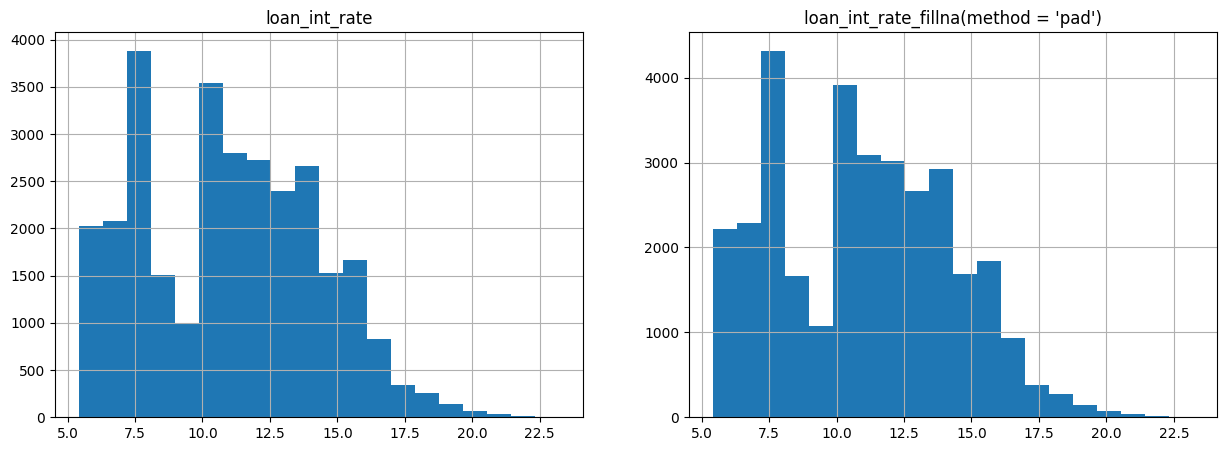

In [20]:
ax1 = plt.subplot(121)
df_example['loan_int_rate'].hist(bins=20, figsize=(15,5));
ax1.set_title("loan_int_rate");

ax2 = plt.subplot(122)
df_pad.hist(bins=20);
ax2.set_title("loan_int_rate_fillna(method = 'pad')");

### **fillna(method = 'backfill')**

In [21]:
df_backfill = df_example['loan_int_rate'].fillna(method = 'backfill')
missing_values_count = df_backfill.isnull().sum()

print(missing_values_count)
df_backfill.head(10)

0


0    16.02
1    11.14
2    12.87
3    15.23
4    14.27
5     7.14
6    12.42
7    11.11
8     8.90
9    14.74
Name: loan_int_rate, dtype: float64

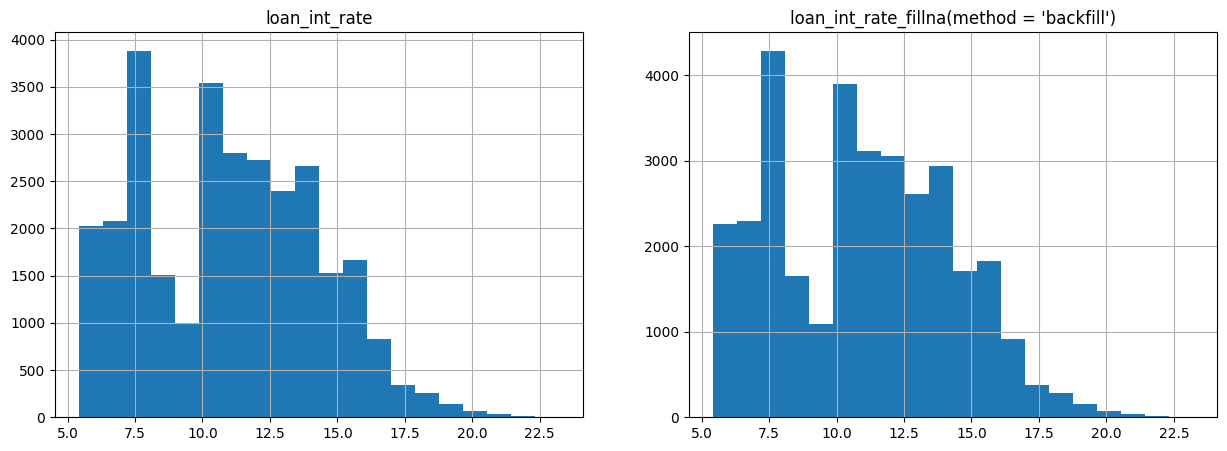

In [22]:
ax1 = plt.subplot(121)
df_example['loan_int_rate'].hist(bins=20, figsize=(15,5));
ax1.set_title("loan_int_rate");

ax2 = plt.subplot(122)
df_backfill.hist(bins=20);
ax2.set_title("loan_int_rate_fillna(method = 'backfill')");

### **Simple Imputer**

In [23]:
from sklearn.impute import SimpleImputer

df_test = df_example['loan_int_rate'].values.reshape(1, 32581)
imputer = SimpleImputer(missing_values = np.nan , strategy = 'mean')
imputer = imputer.fit(df_test)
imputed_data = imputer.transform(df_test)
imputed_data

array([[16.02, 11.14, 12.87, ..., 10.99, 11.48,  9.99]])